# Verify MNIST WebDataset Conversion

This notebook verifies that our MNIST to WebDataset conversion worked correctly.


In [ ]:
import webdataset as wds
import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
import os

# Set up path relative to notebook location
PROJ_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(PROJ_ROOT, "data", "mnist_wds")

In [2]:
# Check what files we have
print("Files in mnist_wds directory:")
files = sorted(os.listdir(DATA_DIR))
for f in files[:5]:  # Show first 5 files
    print(f)
print(f"...and {len(files)-5} more files")

Files in mnist_wds directory:
metadata.json
mnist-test-00000.tar
mnist-test-00001.tar
mnist-test-00002.tar
mnist-test-00003.tar
...and 66 more files


In [3]:
# Verify metadata
metadata_path = os.path.join(DATA_DIR, "metadata.json")
with open(metadata_path, "r") as f:
    metadata = json.load(f)
print("Dataset metadata:")
for k, v in metadata.items():
    print(f"{k}: {v}")

Dataset metadata:
train_shards: 60
test_shards: 10
samples_per_shard: 1000
total_train_samples: 60000
total_test_samples: 10000


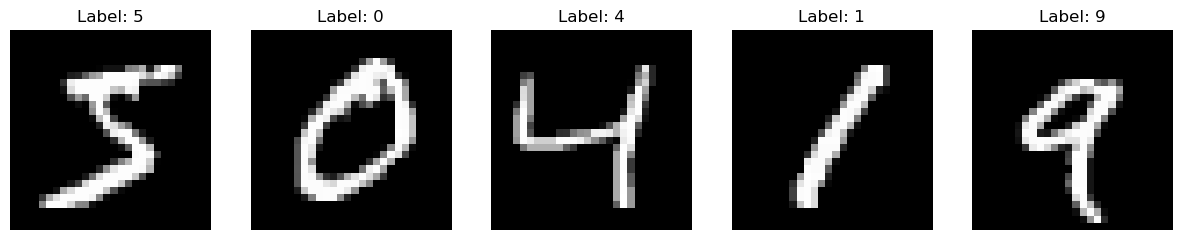

In [5]:
import glob
import os
import webdataset as wds
import matplotlib.pyplot as plt

# Prepare a list of all matching shard files
shard_list = sorted(glob.glob(os.path.join(DATA_DIR, "mnist-train-*.tar")))

# Load the dataset using the list of shard paths
train_data = wds.WebDataset(shard_list).decode("pil").to_tuple("png", "cls")

# Display the first few images
plt.figure(figsize=(15, 3))
for i, (image, label) in enumerate(train_data):
    if i >= 5:  # Show first 5 images
        break

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.show()

/Users/lapuerta/miniconda3/envs/ldm/lib/python3.12/site-packages/webdataset/compat.py:136: UserWarning: WebDataset(shardshuffle=...) is None; set explicitly to False or a number
  warnings.warn("WebDataset(shardshuffle=...) is None; set explicitly to False or a number")


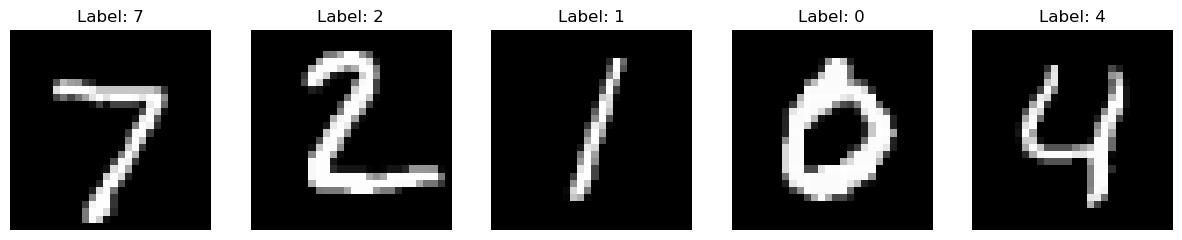

In [6]:
shard_list = sorted(glob.glob(os.path.join(DATA_DIR, "mnist-test-*.tar")))

# Load the dataset using the list of shard paths
test_data = wds.WebDataset(shard_list).decode("pil").to_tuple("png", "cls")

plt.figure(figsize=(15, 3))
for i, (image, label) in enumerate(test_data):
    if i >= 5:  # Show first 5 images
        break

    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.show()

In [7]:
# Verify data properties
image, label = next(iter(train_data))
print("Image Properties:")
print(f"Size: {image.size}")
print(f"Mode: {image.mode}")
print(f"Label type: {type(label)}")
print(f"Label value: {label}")

Image Properties:
Size: (28, 28)
Mode: RGB
Label type: <class 'int'>
Label value: 5


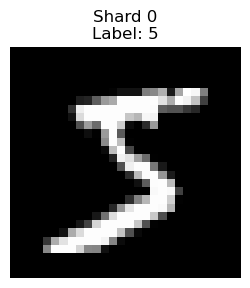

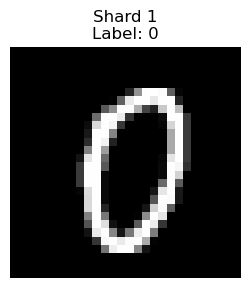

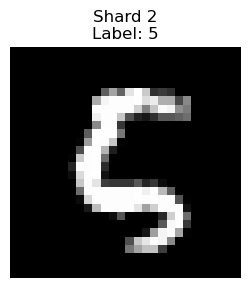

In [8]:
# Test random access from different shards
for shard_num in range(3):  # Check first 3 shards
    shard_path = os.path.join(DATA_DIR, f"mnist-train-{shard_num:05d}.tar")
    dataset = wds.WebDataset(shard_path).decode("pil").to_tuple("png", "cls")

    # Get first image from each shard
    image, label = next(iter(dataset))

    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap="gray")
    plt.title(f"Shard {shard_num}\nLabel: {label}")
    plt.axis("off")
    plt.show()